## Thermal conductivity

Thermal conductivity varies with depth (or pressure) and temperature according to equation (6), introduced previously.  
$$ k(T, z) = \frac{k_{0}(1+cz)}{1+bT} \tag{6}$$
To compute thermal conductivity, first we need to get the temperature distribution with depth, i.e., the geothermal gradient.


### Geothermal Gradient
Let's assume two geothermal gradients $\nabla T_{A}$ and $\nabla T_{B}$ (Table 4) for surface heat flows $q_{0}^{A} = 40 mW\cdot m^{-2}$ and $q_{0}^{B} = 90 mW\cdot m^{-2}$, respectively ([Chapman 1986](https://doi.org/10.1144/GSL.SP.1986.024.01.07)).


**Table 3:** Geothermal gradients $\nabla T_{A}$ and $\nabla T_{B}$ ([Chapman 1986](https://doi.org/10.1144/GSL.SP.1986.024.01.07)).


| z (km) | P (MPa) | T_A $(^o C)$ | T_B $(^o C)$ |
|:------|:------|:--------|:------|
|0.00|	0.00|	0.00|	0.00|
|2.50|	70.87|	28.51|	68.23|
|5.00|	143.30|	61.10|	146.64|
.
.
.
|35.00|	1012.45|342.16|	896.13|
|37.50|	1082.55|358.45|	940.94|
|40.00|	1154.99|374.75|	983.71|

The geothermal gradient data is saved as a .csv file under files (files/geotherms.csv).
Using this data, we will:
1. import the data into a DataFrame,
2. interpolate the data, and
3. plot the geothermal gradient.

> A useful resource to understand the basics of programming and plotting with python can be found here  : https://swcarpentry.github.io/python-novice-gapminder/

### Plotting the Geothermal Gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Read the CSV file into a DataFrame
df = pd.read_csv('files/geotherms.csv')
df.head()

ImportError: cannot import name 'find_stack_level' from 'pandas.util._exceptions' (/apps/share64/debian10/anaconda/anaconda-7/lib/python3.8/site-packages/pandas/util/_exceptions.py)

In [ ]:
# -----------------------------------------------------
# Interpolate the input data
# -----------------------------------------------------
# Create a new DataFrame to store the interpolated data
df_interpolated = pd.DataFrame(columns=df.columns)

# Interpolate the data every 1 km
df_interpolated['z(km)'] = range(0, 41, 1)

df_interpolated['P(MPa)'] = np.interp(df_interpolated['z(km)'], df['z(km)'], df['P(MPa)'])
df_interpolated['T_A(C)'] = np.interp(df_interpolated['z(km)'], df['z(km)'], df['T_A(C)'])
df_interpolated['T_B(C)'] = np.interp(df_interpolated['z(km)'], df['z(km)'], df['T_B(C)'])

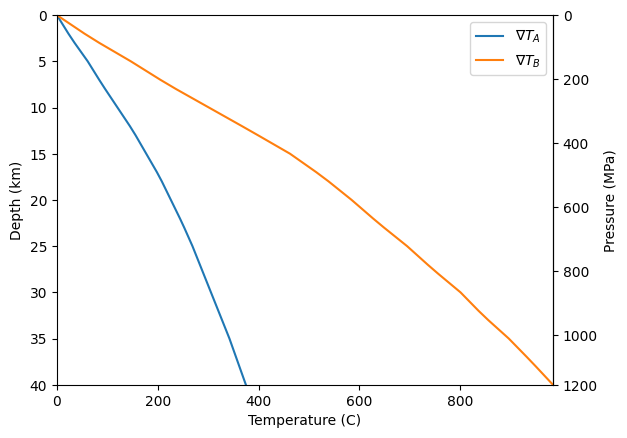

In [ ]:
# --------------------------------------------------------------
# Plot interpolated geothermal gradients with depth and pressure
# --------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(df_interpolated['T_A(C)'], df_interpolated['z(km)'], label=''r'$\nabla T_{A}$')
ax.plot(df_interpolated['T_B(C)'], df_interpolated['z(km)'], label=''r'$\nabla T_{B}$')
ax.set_xlim(0, df_interpolated[['T_A(C)', 'T_B(C)']].max().max()) # Set x-axis limits
ax.set_ylim(df_interpolated['z(km)'].max(), 0)  # Set y-axis limits
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (km)')
ax.legend()

# Create a function to convert depth to pressure
def depth_to_pressure(depth):
    return np.interp(depth, df_interpolated['z(km)'], df_interpolated['P(MPa)'])

# Create a function to convert pressure to depth
def pressure_to_depth(pressure):
    return np.interp(pressure, df_interpolated['P(MPa)'], df_interpolated['z(km)'])

# Create a secondary y-axis to show pressure
secax_y = ax.secondary_yaxis('right', functions=(depth_to_pressure, pressure_to_depth))
secax_y.set_ylabel('Pressure (MPa)')

plt.show()

### Computing thermal conductivity within continents

Now that we have the geothermal gradients, let's use Eq. 6 to compute thermal conductivity for two common rock types, granite and granulite, in the continental regions.

**Table 4:** Themal conductivity parameter values ([Chapman 1986](https://doi.org/10.1144/GSL.SP.1986.024.01.07)).


|     | Granite | Granulite |
|:----|:-------:|:---------:|
| K$_{0}$ (W/m K) | $3.0$ | $2.6$ |
| b (/K) | $1.5 \times 10^{-3}$ | $1.0 \times 10^{-3}$ |
| c (/km) | $1.5$ | $1.5$ |

In [ ]:
# Thermal conductivity parameters
k0_granite   = 3
k0_granulite = 2.6
b_granite    = 1.5e-3
b_granulite  = 1.0e-3
c_granite    = 1.5e-3
c_granulite  = 1.5e-3

In [ ]:
# Copy the previous DataFrame to a new one
df_conductivity = df_interpolated.copy()

# Function representing Eq.6
def thermal_conductivity(T, z, k0, b, c):
    return k0 * (1 + c * z) / (1 + b * T)

# Calculate the thermal conductivities using the function
df_conductivity['k_A_granite(W/mK)'] = thermal_conductivity(df_conductivity['T_A(C)'], df_conductivity['z(km)'], k0_granite, b_granite, c_granite)
df_conductivity['k_B_granite(W/mK)'] = thermal_conductivity(df_conductivity['T_B(C)'], df_conductivity['z(km)'], k0_granite, b_granite, c_granite)
df_conductivity['k_A_granulite(W/mK)'] = thermal_conductivity(df_conductivity['T_A(C)'], df_conductivity['z(km)'], k0_granulite, b_granulite, c_granulite)
df_conductivity['k_B_granulite(W/mK)'] = thermal_conductivity(df_conductivity['T_B(C)'], df_conductivity['z(km)'], k0_granulite, b_granulite, c_granulite)

In [2]:
# Plot the thermal conductivities
fig, ax = plt.subplots()
ax.plot(df_conductivity['k_A_granite(W/mK)'], df_conductivity['z(km)'], color='red', linestyle='-', label=''r'$k_{A, granite}$')
ax.plot(df_conductivity['k_B_granite(W/mK)'], df_conductivity['z(km)'], color='red', linestyle='--', label=''r'$k_{B, granite}$')
ax.plot(df_conductivity['k_A_granulite(W/mK)'], df_conductivity['z(km)'], color='green', linestyle='-', label=''r'$k_{A, granulite}$')
ax.plot(df_conductivity['k_B_granulite(W/mK)'], df_conductivity['z(km)'], color='green', linestyle='--', label=''r'$k_{B, granulite}$')

ax.set_xlim(df_conductivity[['k_A_granite(W/mK)', 'k_B_granite(W/mK)', 'k_A_granulite(W/mK)', 'k_B_granulite(W/mK)']].min().min(), \
            df_conductivity[['k_A_granite(W/mK)', 'k_B_granite(W/mK)', 'k_A_granulite(W/mK)', 'k_B_granulite(W/mK)']].max().max())
ax.set_ylim(df_conductivity['z(km)'].max(), 0)
ax.set_xlabel('Thermal Conductivity (W/mK)')
ax.set_ylabel('Depth (km)')
ax.legend()
ax.set_title('Thermal Conductivity vs Depth')

# Create a secondary y-axis to show pressure
secax_y = ax.secondary_yaxis('right', functions=(depth_to_pressure, pressure_to_depth))
secax_y.set_ylabel('Pressure (MPa)')

plt.show()

NameError: name 'plt' is not defined

 
&nbsp; <div style="text-align: right">   
      &rarr; <b>NEXT:[Mantle radioactive heat production](./4_mantle_radioactive_heat_generation.ipynb)</b> <a href=""></a> &nbsp;&nbsp;
      <img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
</div>